<a href="https://www.kaggle.com/code/chris36/house-price-analysis-and-modeling-python?scriptVersionId=193589440" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as skl
import matplotlib as mp
import seaborn as sn
import statistics as stats


import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Load data and data inspection

In [2]:
# load data
house_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
#data inspection
house_data.shape

(1460, 81)

There are 1460 rows and 81 columns 

In [4]:
# drop duplicates
house_data.drop_duplicates().shape[0] == house_data.shape[0]

True

There is no duplicated rows in data

## Drop Id and SalePrice from features 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

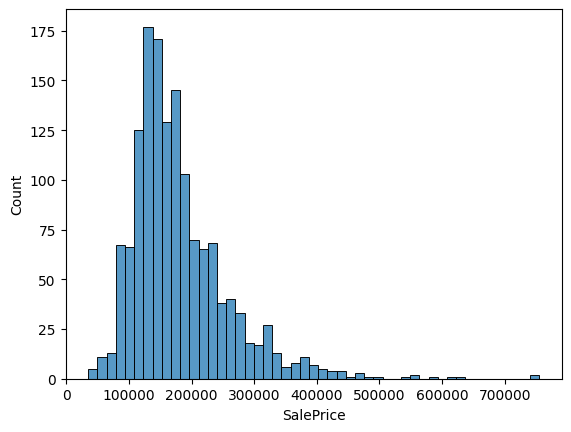

In [5]:
# plot target 
sn.histplot(house_data.SalePrice)

<Axes: xlabel='SalePrice'>

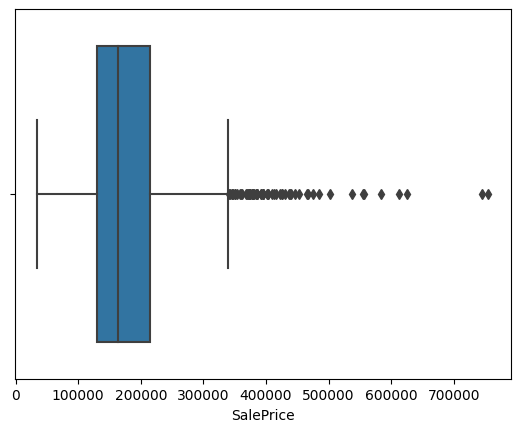

In [6]:
sn.boxplot(data = house_data,
              x ="SalePrice"
              )

<Axes: ylabel='SalePrice'>

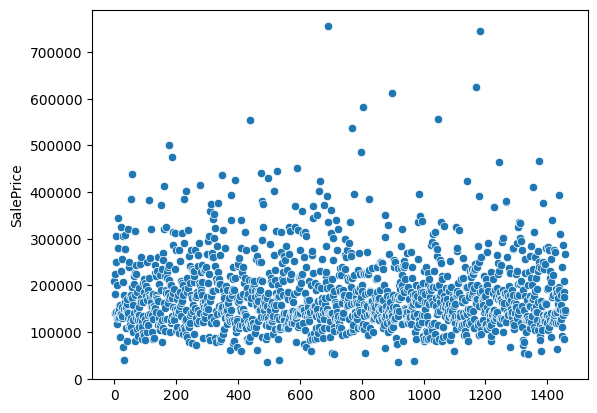

In [7]:
sn.scatterplot(data = house_data,
              x = range(house_data.SalePrice.shape[0]),
              y ="SalePrice"
              )

In [8]:
# create target feature
target = house_data.SalePrice

# remove id and target columns

house_data1 = house_data.drop(columns=['Id'],axis = 1)

# check
house_data1.shape[1]==house_data.shape[1]-1 and\
not ['Id'] in house_data1.columns.tolist()

True

In [9]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
if not(target.isna().mean()) :
    print("There is no missing value in data")
else:
    print(f"prop NA = {target.isna().mean()}")

There is no missing value in data


<Axes: xlabel='SalePrice'>

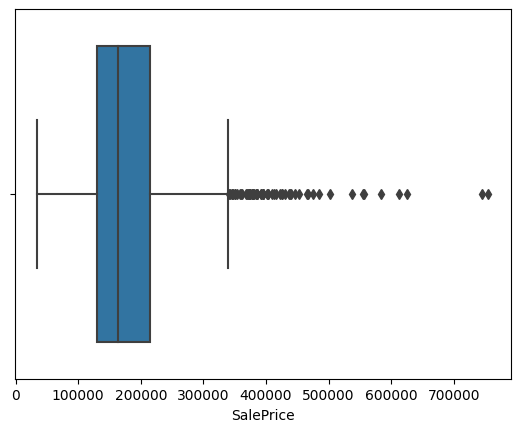

In [11]:
# boxplot SalePrice
sn.boxplot(data = house_data,
           x="SalePrice"
          )

In [12]:
# select numeric columns
num_data = house_data1[house_data1.select_dtypes(include='number').columns]
print(f"There are {num_data.shape[1]} features in house_data1")

There are 37 features in house_data1


In [13]:
house_data1.describe(include = "number")


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
#categorical columns 
cat_data = house_data1[house_data1.select_dtypes('object').columns]
print(f"There are {cat_data.shape[1]} categorical features in cat_data")

There are 43 categorical features in cat_data


In [15]:
house_data1.describe(include = "object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Missing values 

In [16]:
# categorical features
na_catCols = cat_data.columns[cat_data.isna().mean() !=0.0].tolist()
cat_data[na_catCols].isna().mean().mean()

0.3202482876712329

In [17]:
na_catCols = cat_data.columns[cat_data.isna().mean() > 0.2].tolist()
cat_data[na_catCols].isna().mean().mean()

0.7955479452054796

These features have NA's proportion above 0.3. How to deal with that ?

In [18]:
# numerical features with na or missing values prop >=0.3
na_numCols = num_data.columns[num_data.isnull().mean()> 0.0].tolist()
num_data[na_numCols].isna().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

These 3 columns has NAs. How to deal with that?

In [19]:
# NA propoortion in house_data1
house_data1.isna().mean().mean()

0.0670291095890411

In [20]:
# fill with mode : doesn't change anything 
#for feature in house_data1.columns:
    #if type(feature) == "object":
        #house_data1[feature].fillna(stats.mode(house_data1[feature]))
    #if type(feature) == "numeric" :
        #house_data1[feature].fillna(stats.median(house_data1[feature]))
# is not convenient : the most common values for rooms for e.g might not be the right one for 
#any house presenting missing value 

# maybe imputing by a model is a better bet ! TODO 


In [21]:
house_data1.isna().mean().mean()

0.0670291095890411

There is almost 7% of missing values in dataset, we will get rid of it first

## Features selection

In [22]:
# drop features with na prop > 0.2
house_data2 = house_data1.drop(na_catCols,axis=1)
print(f"house_data2 has shape {house_data2.shape}")

house_data2 has shape (1460, 74)


In [23]:
house_data2.isna().mean().mean()

0.007960014809329877

In [24]:
#drop features  with Nas 
house_data3 = house_data2.dropna(axis = 1)
print(f"house_data3 shape :{house_data3.shape}")

house_data3 shape :(1460, 61)


In [25]:
# missing values check
if house_data3.isna().mean().sum() == 0.0 :
    print("There is no missing value in house_data3")
else:
    print("missing values still in house_data3")

There is no missing value in house_data3


### note : we might also impute missing values  with random forest for example !

In [26]:
prop = 1 - round(house_data3.shape[1]/house_data.shape[1],2)
print("Removed features proportion is {}, though, we get rid of {}% of \
potential information or just useless features 🤔".format(round(prop,2),round(prop*1e2,2))) 

Removed features proportion is 0.25, though, we get rid of 25.0% of potential information or just useless features 🤔


In [27]:
# delete useless df
del house_data1, house_data2

In [28]:
# features selection 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X = house_data3
y = target
X, y = make_regression(
                       n_features=X.shape[1], 
                       n_informative=7,
                       random_state=0,
                       shuffle=False,)
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X, y)
#print(regr.predict([[0, 0, 0, 0]]))


RandomForestRegressor(max_depth=3, random_state=0)

In [29]:
forest_importances = pd.Series(regr.feature_importances_,index = house_data3.columns)
#fig, ax = plt.subplots()
forest_importances.sort_values(ascending= False)[:5]

MSSubClass    0.441875
Utilities     0.212713
LotArea       0.153708
LotShape      0.025514
ExterQual     0.014990
dtype: float64

<Axes: >

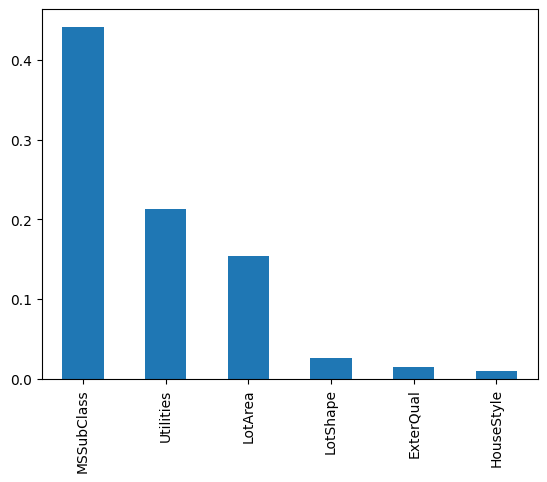

In [30]:
# plot features importance (forest importance) 
forest_importances.sort_values(ascending= False)[:6].plot.bar()

In [31]:
features = forest_importances.sort_values(ascending= False)[:5].index.tolist()

In [32]:
# add SalePrice to features
features.append("SalePrice")

In [33]:
house_data4 = house_data3[features]

In [34]:
# categorical features 
house_data4.select_dtypes("object").columns.tolist()

['Utilities', 'LotShape', 'ExterQual']

In [35]:
# numeric features 
house_data4.select_dtypes("number").columns.tolist()

['MSSubClass', 'LotArea', 'SalePrice']

## EDA 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSSubClass', ylabel='Count'>

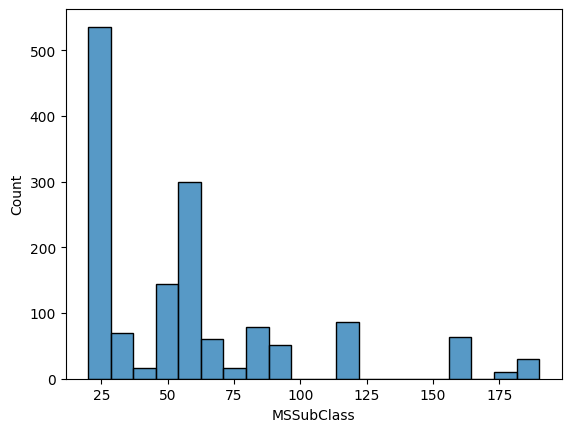

In [36]:
# histogram MSSubClass
sn.histplot(data = house_data4,
            x = "MSSubClass")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LotArea', ylabel='Count'>

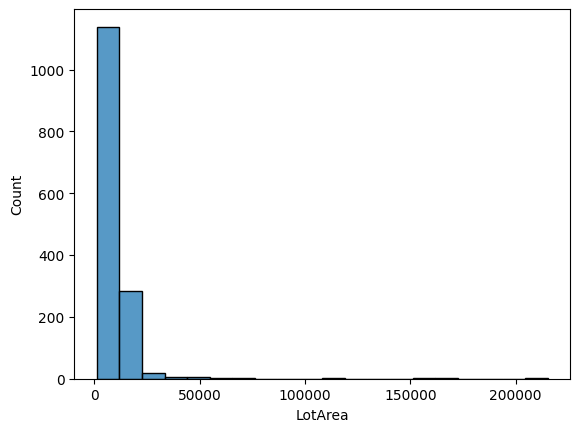

In [37]:
# histogram of LotArea
sn.histplot(data = house_data4.select_dtypes("number"),
              x="LotArea",
            bins = 20
           )

<Axes: xlabel='Utilities', ylabel='count'>

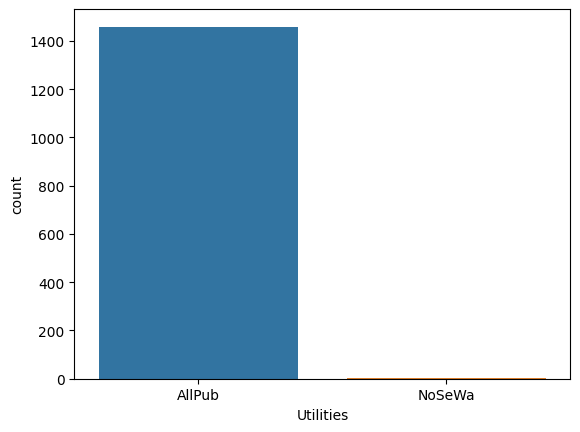

In [38]:
# barplot SUtilities
sn.countplot(data = house_data4,
              x="Utilities")

<Axes: xlabel='LotShape', ylabel='count'>

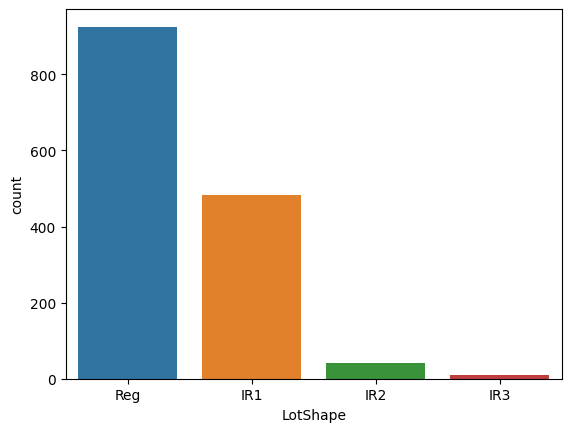

In [39]:
# countplot LotShape
sn.countplot(data = house_data4,
              x="LotShape")

<Axes: xlabel='ExterQual', ylabel='count'>

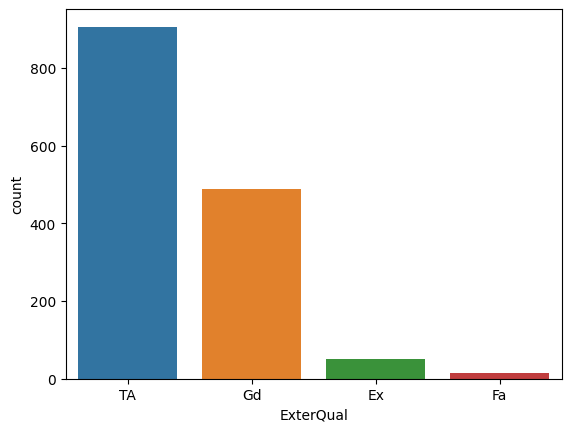

In [40]:
# countplot ExterQual
sn.countplot(data = house_data4,
              x="ExterQual",
            order = ["TA","Gd","Ex","Fa"]
            )

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

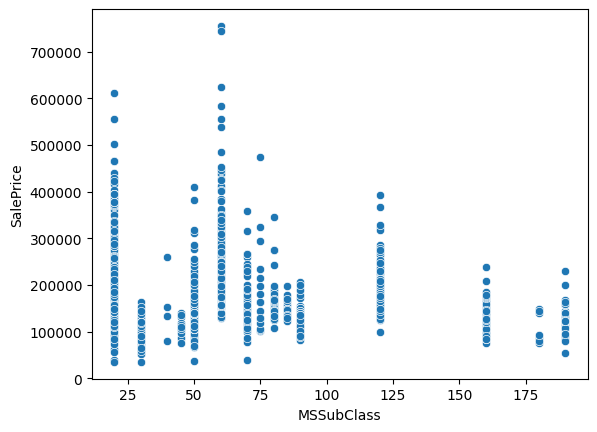

In [41]:
# scatter plot SalePrice vs MSSubClass
sn.scatterplot(data = house_data4,
              x="MSSubClass",
              y="SalePrice")

<Axes: xlabel='LotArea', ylabel='SalePrice'>

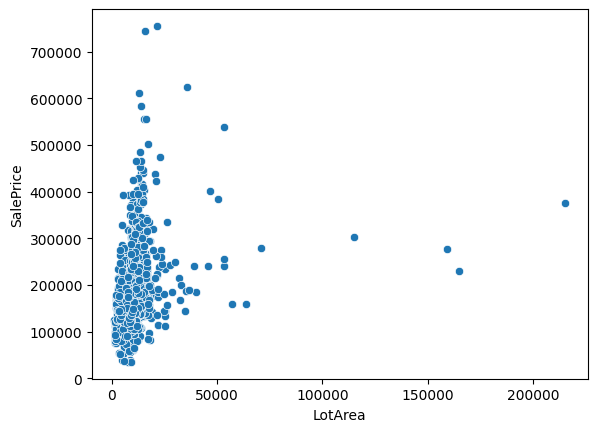

In [42]:
# scatter plot SalePrice vs LotArea
sn.scatterplot(data = house_data4.select_dtypes("number"),
              x="LotArea",
              y="SalePrice")

<Axes: xlabel='Utilities', ylabel='SalePrice'>

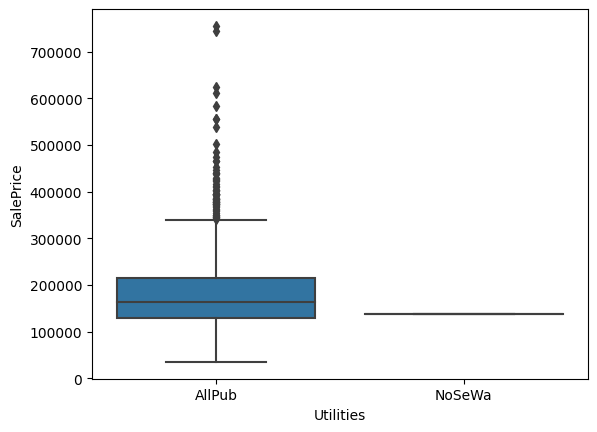

In [43]:
# boxplot SalePrice vs Utilities
sn.boxplot(data = house_data4,
              x="Utilities",
              y="SalePrice")

<Axes: xlabel='LotShape', ylabel='SalePrice'>

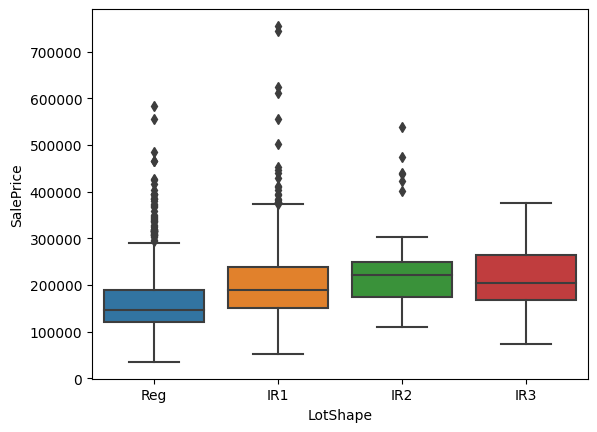

In [44]:
# boxplot SalePrice vs LotShape
sn.boxplot(data = house_data4,
              x="LotShape",
              y="SalePrice")

<Axes: xlabel='ExterQual', ylabel='SalePrice'>

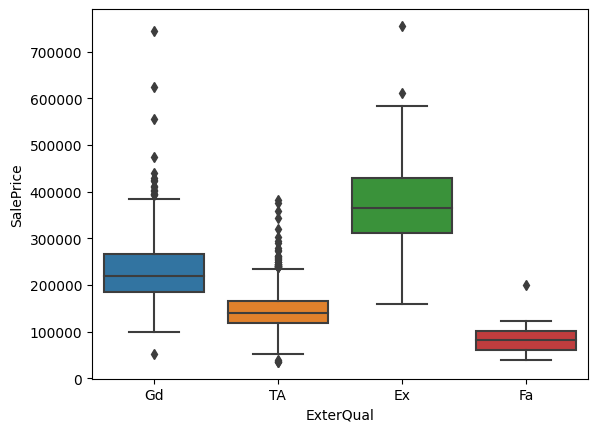

In [45]:
# boxplot SalePrice vs ExterQual
sn.boxplot(data = house_data4,
              x="ExterQual",
              y="SalePrice")

To be continued 😉...